In [3]:
# Basic
import os
import numpy as np
import tensorflow as tf

# Image 
from glob import glob
from PIL import Image

# Visualize
import matplotlib.pyplot as plt
%matplotlib inline

## Real Image 파일 사용해보기

In [13]:
# os listdir로 dataset 위치 찾아가기
print(len(os.listdir('../dataset/mnist/training')))
data_path_os = os.listdir('../dataset/mnist/training')
print(data_path_os)

# glob을 이용한 dataset 위치 찾아가기
data_path = glob('../dataset/mnist/training/0/*.png') # png 포함된 파일들 전체 링크 가져오기
print(len(data_path), data_path[:3])

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
5923 ['../dataset/mnist/training/0\\1.png', '../dataset/mnist/training/0\\1000.png', '../dataset/mnist/training/0\\10005.png']


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


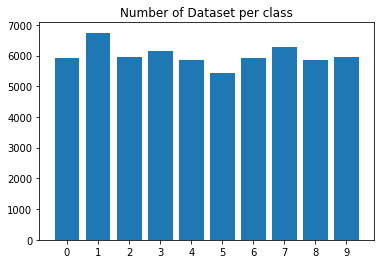

In [17]:
label_nums = data_path_os 

nums_dataset = []

# label 별로 이미지가 몇개가 있는지
for lbl_n in label_nums:
    data_per_class = os.listdir('../dataset/mnist/training/'+lbl_n)
    nums_dataset.append(len(data_per_class))
print(nums_dataset)

plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')
plt.show()

## Pillow 를 활용한 열기

In [20]:
image_pil = Image.open(data_path[0])
image_pil

(28, 28)


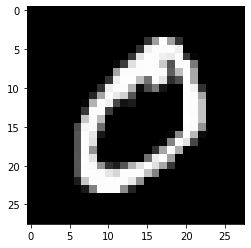

In [21]:
img = np.array(image_pil)
print(img.shape)

plt.imshow(img, 'gray')
plt.show()

## TensorFlow 로 열기
- shape적으로 gray 이미지는 1이 붙어서 들어감 (차원 증가 전처리 해줄필요x)

(28, 28, 1)


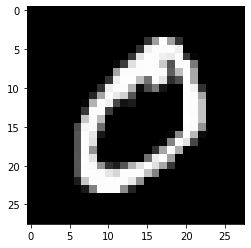

In [24]:
gfile = tf.io.read_file(data_path[0])
tf_image = tf.io.decode_image(gfile)

print(tf_image.shape)

plt.imshow(tf_image[:, :, 0], 'gray')

## Label 얻기

In [29]:
label = list(map(int, label_nums))
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## 데이터 이미지 사이즈 알기

In [37]:
from tqdm import tqdm

heights, widths = [], []

data_path[:10]

for path in tqdm(data_path):
    img_pil = Image.open(path)
    img = np.array(img_pil)
    h, w = img.shape
    
    heights.append(h)
    widths.append(w)

print(set(heights), np.unique(heights))
print(set(widths), np.unique(widths))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5923/5923 [00:38<00:00, 153.27it/s]

{28} [28]
{28} [28]
